In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from matplotlib.colors import ListedColormap

In [4]:
dataset = pd.read_csv(r'C:\Users\sujun\Desktop\STAT 6240\Homework2\SocialNetworkAds.csv')
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values
dataset.head(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## KNN

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


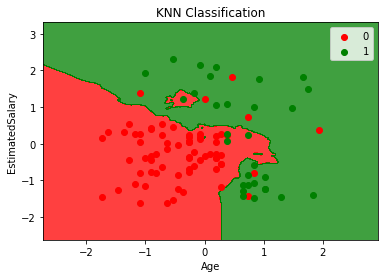

precision: [0.94029851 0.78787879] 
recall: [0.9        0.86666667] 
f1-score: [0.91970803 0.82539683]
confusion_matrix
 [[63  7]
 [ 4 26]]


In [5]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
Cm = confusion_matrix(y_test, y_pred)
As =  accuracy_score(y_test, y_pred)
pre, rec, f1, sup = precision_recall_fscore_support(y_test, y_pred)

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()
print("precision:", pre, "\nrecall:", rec, "\nf1-score:", f1)
print('confusion_matrix\n',Cm)

## SVM

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


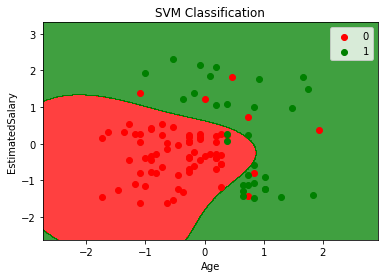

precision: [0.96923077 0.8       ] 
recall: [0.9        0.93333333] 
f1-score: [0.93333333 0.86153846]
confusion_matrix
 [[63  7]
 [ 2 28]]


In [6]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
Cm = confusion_matrix(y_test, y_pred)
As =  accuracy_score(y_test, y_pred)
pre, rec, f1, sup = precision_recall_fscore_support(y_test, y_pred)

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()
print("precision:", pre, "\nrecall:", rec, "\nf1-score:", f1)
print('confusion_matrix\n',Cm)